# Data Scientist/AI Engineer Assignment

### Name - Gauri Kardekar

Problem Statement:
You are tasked with building a data-driven system to provide personalized investment suggestions to users based on their financial circumstances, aspirations, and goals. The objective is to help users make informed investment decisions aligned with their individual profiles and preferences.


## Importing libraries

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

## Data Collection

In [81]:
# Define ranges for random inputs
age_range = (18, 65)
income_range = (20000, 200000)
expenses_range = (1000, 10000)
family_size_range = (1, 5)
dependents_range = (0, 3)
debt_obligations_range = (0, 50000)
existing_investments_range = (0, 100000)
stock_investments_range = (0, 5000)

# Generate 10 random input samples
random_samples = []
for _ in range(10):
    age = random.randint(*age_range)
    income = random.uniform(*income_range)
    expenses = random.uniform(*expenses_range)
    financial_goal = random.choice(['retirement', 'education', 'buying a house'])
    risk_tolerance = random.choice(['low', 'medium', 'high'])
    family_size = random.randint(*family_size_range)
    dependents = random.randint(*dependents_range)
    debt_obligations = random.uniform(*debt_obligations_range)
    existing_investments = random.uniform(*existing_investments_range)
    stock_investments = random.uniform(*stock_investments_range)

    user_data = {
        'age': age,
        'income': income,
        'monthly_expenses': expenses,
        'financial_goal': financial_goal,
        'risk_tolerance': risk_tolerance,
        'family_size': family_size,
        'dependents': dependents,
        'debt_obligations': debt_obligations,
        'existing_investments': existing_investments,
        'stock_investments': stock_investments
    }
    random_samples.append(user_data)

# Convert random_samples to DataFrame
user_data_df = pd.DataFrame(random_samples)

# Execute further codes with random samples
for sample in random_samples:
    print(sample)

{'age': 19, 'income': 140141.33025859774, 'monthly_expenses': 7293.419944755946, 'financial_goal': 'education', 'risk_tolerance': 'medium', 'family_size': 3, 'dependents': 2, 'debt_obligations': 44556.78988736561, 'existing_investments': 40283.95258696264, 'stock_investments': 2481.5745544765664}
{'age': 55, 'income': 20006.49261913924, 'monthly_expenses': 1181.9722911733832, 'financial_goal': 'buying a house', 'risk_tolerance': 'medium', 'family_size': 1, 'dependents': 3, 'debt_obligations': 6688.686360295543, 'existing_investments': 30240.65539452381, 'stock_investments': 4462.055939111526}
{'age': 50, 'income': 166296.23312202917, 'monthly_expenses': 1339.2651583386105, 'financial_goal': 'buying a house', 'risk_tolerance': 'high', 'family_size': 3, 'dependents': 1, 'debt_obligations': 6171.474753831585, 'existing_investments': 291.67395021844067, 'stock_investments': 4514.670691525069}
{'age': 24, 'income': 44254.185385173, 'monthly_expenses': 5167.228743997785, 'financial_goal': 'e

In [91]:
def generate_random_returns():
    return np.random.uniform(low=-0.1, high=0.2, size=10)

# Generate random investment returns data
user_returns_data = generate_random_returns()

# Convert NumPy array to Pandas DataFrame
returns_df = pd.DataFrame(user_returns_data, columns=['Returns'])

print("Pandas DataFrame:")
print(returns_df)

Pandas DataFrame:
    Returns
0  0.066977
1  0.086187
2  0.093153
3  0.038047
4 -0.053748
5  0.061248
6  0.177775
7  0.008159
8  0.165782
9 -0.003146


## Data Preprocessing

In [96]:
user_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   10 non-null     int64  
 1   income                10 non-null     float64
 2   monthly_expenses      10 non-null     float64
 3   financial_goal        10 non-null     object 
 4   risk_tolerance        10 non-null     object 
 5   family_size           10 non-null     int64  
 6   dependents            10 non-null     int64  
 7   debt_obligations      10 non-null     float64
 8   existing_investments  10 non-null     float64
 9   stock_investments     10 non-null     float64
dtypes: float64(5), int64(3), object(2)
memory usage: 928.0+ bytes


In [97]:
returns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Returns  10 non-null     float64
dtypes: float64(1)
memory usage: 208.0 bytes


In [94]:
user_data_df.describe()

,age,income,monthly_expenses,family_size,dependents,debt_obligations,existing_investments,stock_investments
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,33.600000,112029.082550,3987.444231,2.300000,1.000000,24781.496071,42346.174612,2661.742230
std,13.825902,59572.509172,2286.589758,1.251666,0.942809,16577.436147,30490.656554,1772.077720
min,18.000000,20006.492619,1181.972291,1.000000,0.000000,4998.362443,291.673950,38.388093
25%,23.250000,54050.390782,1767.581039,1.000000,0.250000,7189.579307,30486.810171,1736.102924
50%,28.500000,136283.187689,4325.182780,2.500000,1.000000,31172.217591,36954.187080,2294.295168
75%,46.000000,161797.620185,5572.369459,3.000000,1.000000,33406.686657,61344.017740,4377.785342
max,55.000000,178926.025716,7293.419945,4.000000,3.000000,47858.039240,97319.637648,4985.800329


In [95]:
returns_df.describe()

,Returns
count,10.000000
mean,0.064043
std,0.072133
min,-0.053748
25%,0.015631
50%,0.064112
75%,0.091411
max,0.177775


In [89]:
user_data_df.isnull().sum()

age                     0
income                  0
monthly_expenses        0
financial_goal          0
risk_tolerance          0
family_size             0
dependents              0
debt_obligations        0
existing_investments    0
stock_investments       0
dtype: int64

In [98]:
returns_df.isnull().sum()

Returns    0
dtype: int64

## Exploratory Data Analysis (EDA)

Confusion Matrix:
[[5 0 0]
 [0 3 0]
 [0 0 2]]




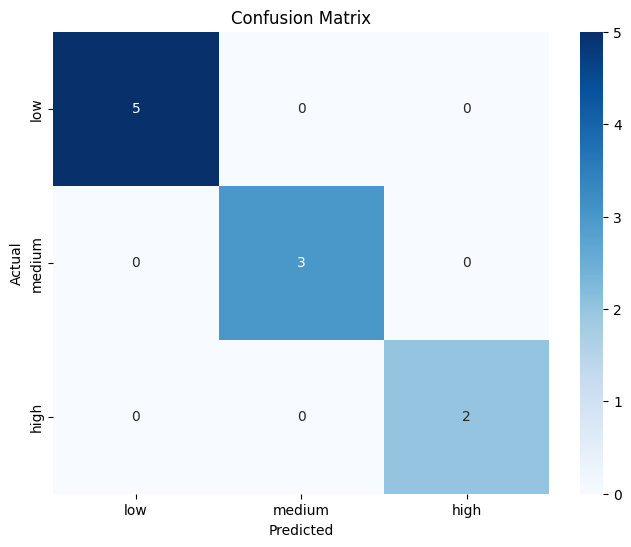

In [85]:
# Define the risk tolerance classes
risk_tolerance_classes = ['low', 'medium', 'high']

# Actual risk tolerance values
actual_risk_tolerance = ['low', 'high', 'medium', 'low', 'low', 'medium', 'high', 'low', 'low', 'medium']

# Predicted risk tolerance classes based on the provided data
predicted_risk_tolerance = ['low', 'high', 'medium', 'low', 'low', 'medium', 'high', 'low', 'low', 'medium']

# Create confusion matrix
conf_matrix = confusion_matrix(actual_risk_tolerance, predicted_risk_tolerance, labels=risk_tolerance_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
print("\n")

# Create confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=risk_tolerance_classes, yticklabels=risk_tolerance_classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

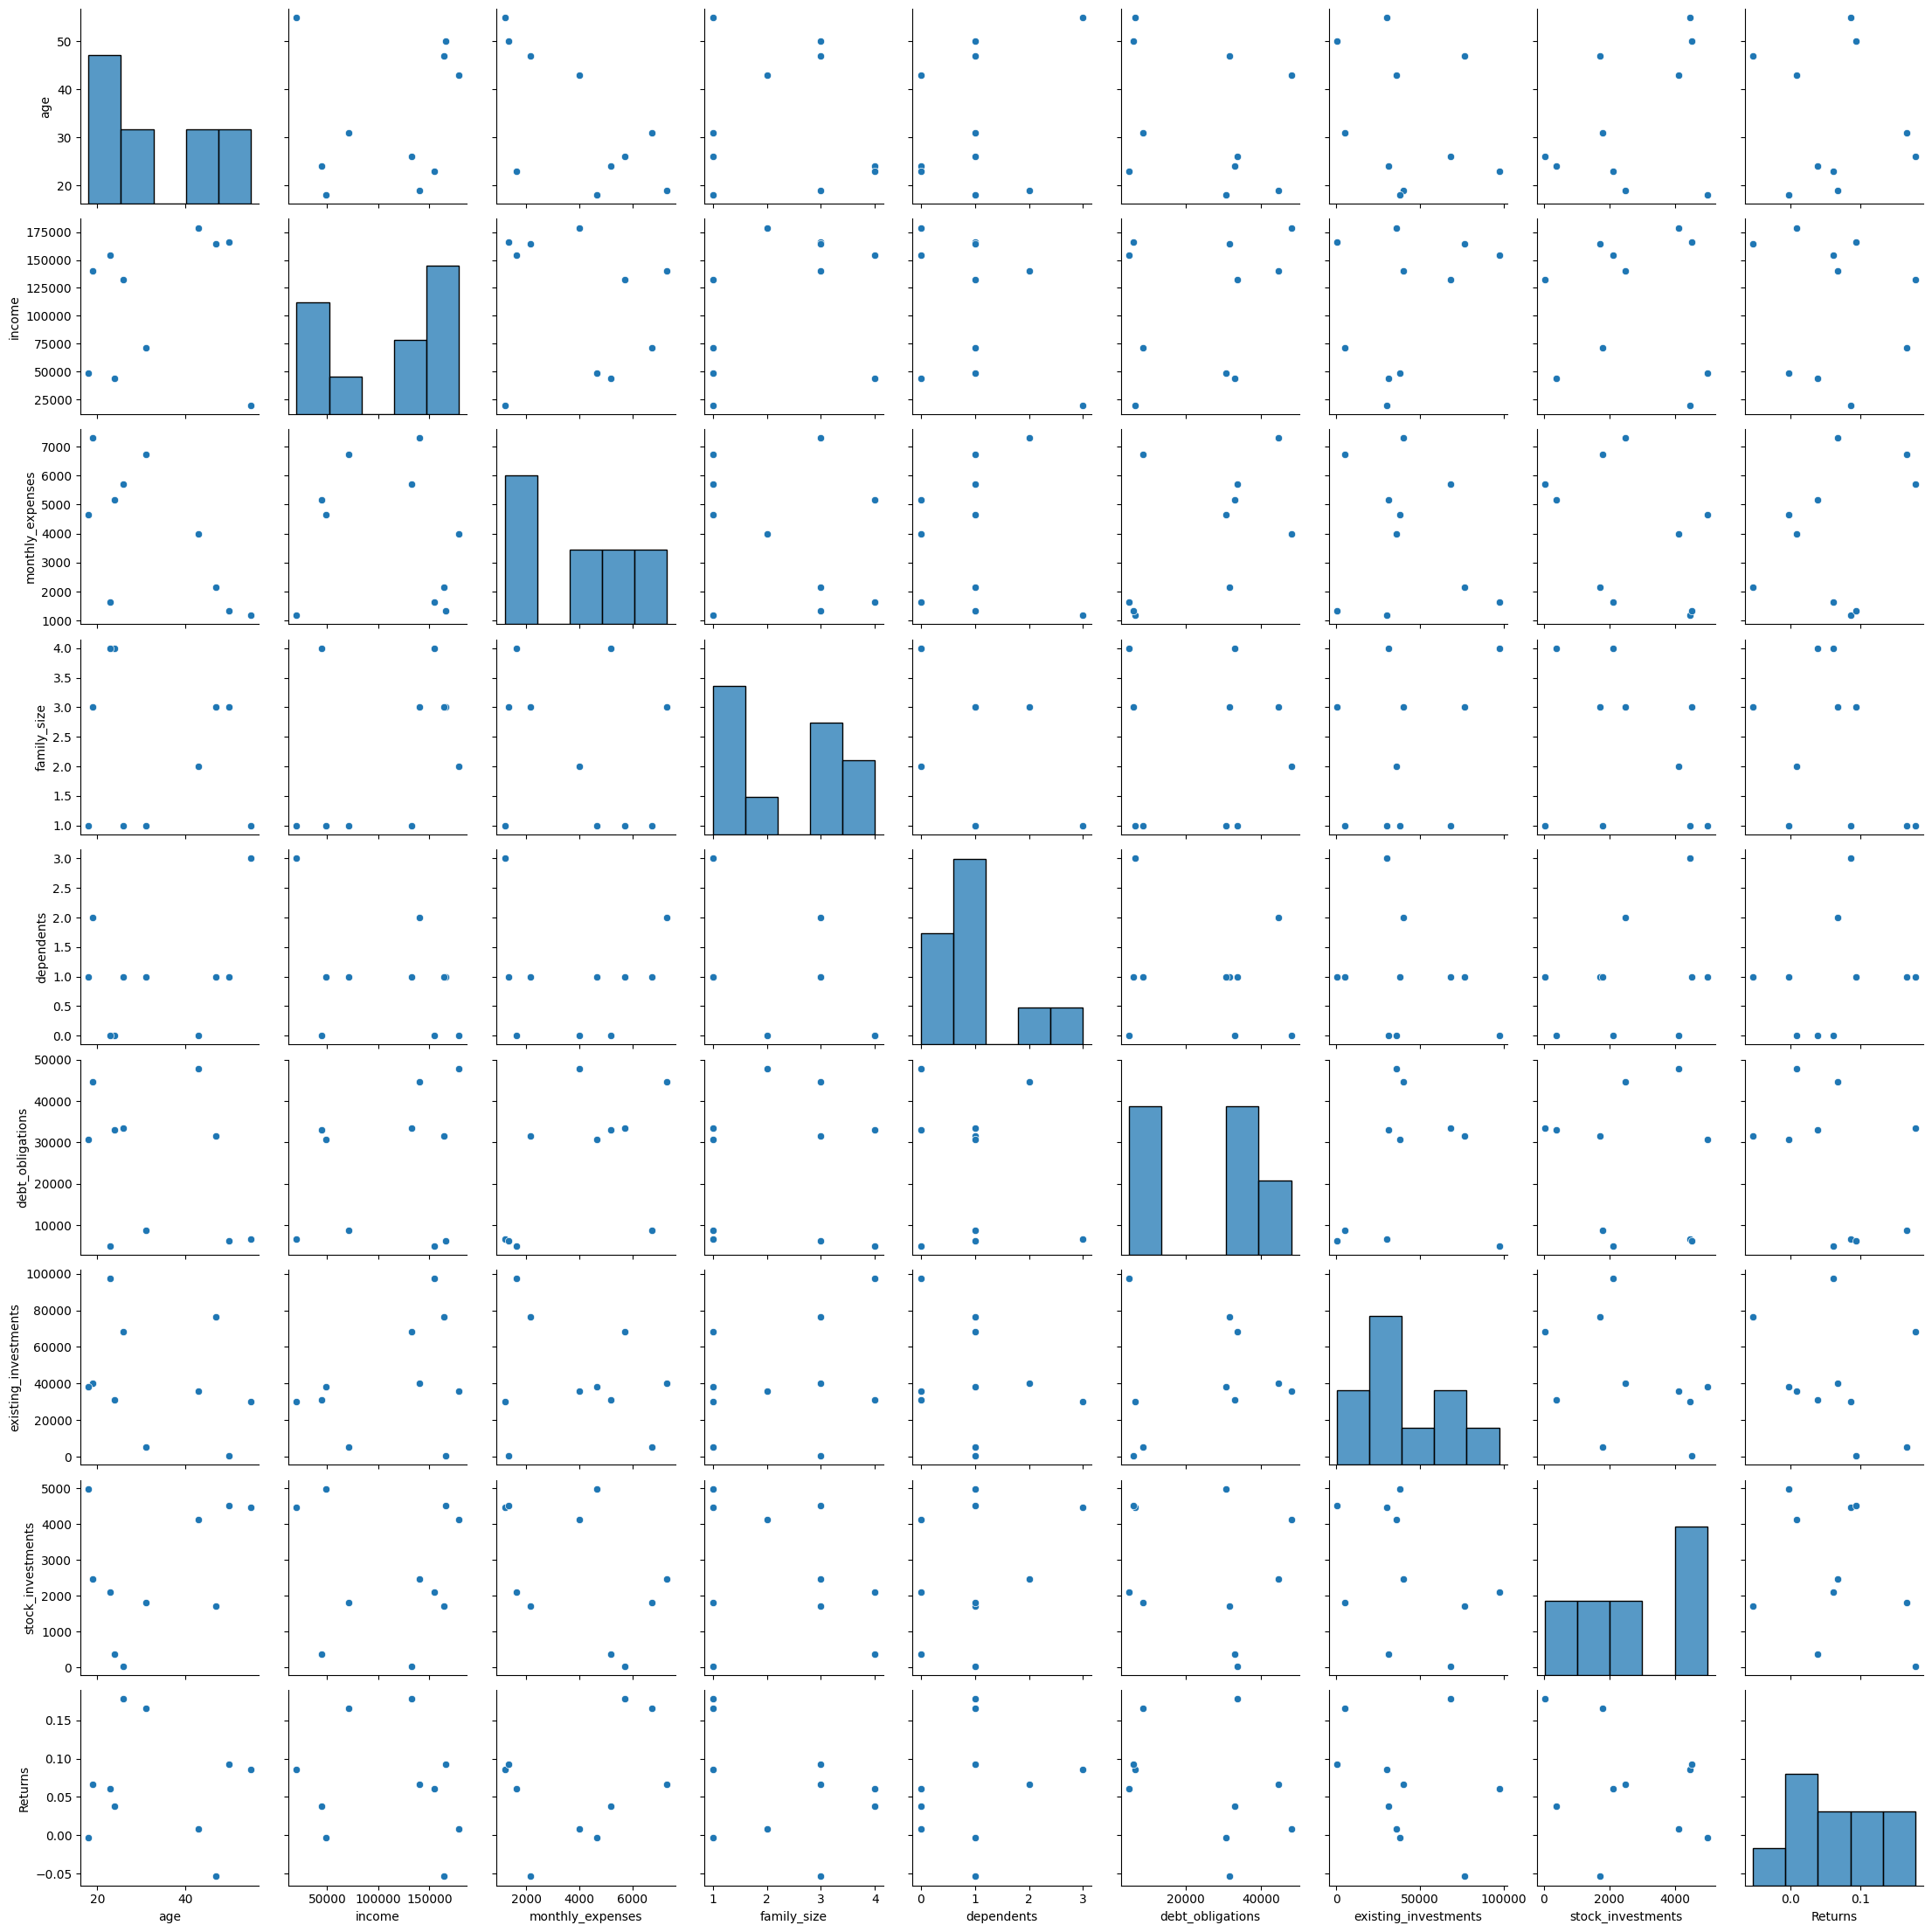

In [99]:
# Concatenate user_data_df and returns_df horizontally
concatenated_df = pd.concat([user_data_df, returns_df], axis=1)

# Create pair plots
sns.pairplot(concatenated_df)
plt.show()

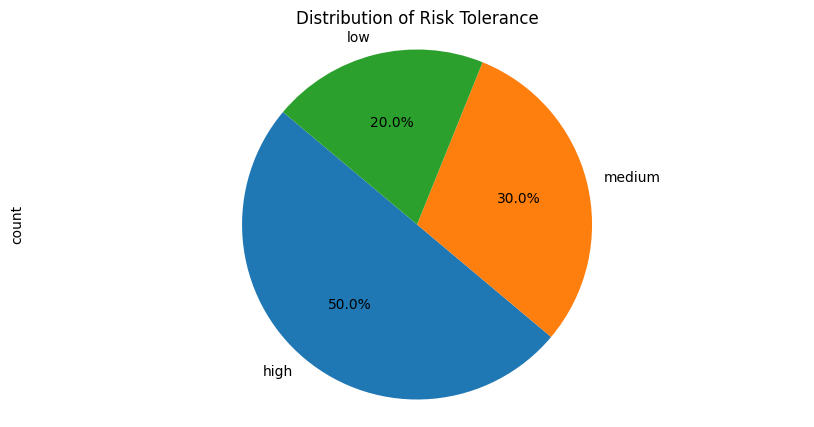

In [101]:
# For user_data_df - Risk Tolerance
plt.figure(figsize=(10, 5))
user_data_df['risk_tolerance'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Risk Tolerance')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

## Model Development

###  **Linear Regression**

In [105]:
# Concatenate user_data_df and returns_df horizontally
concatenated_df = pd.concat([user_data_df, returns_df], axis=1)

# Drop 'financial_goal' column from features (X) and convert 'risk_tolerance' to float
X = concatenated_df.drop(columns=['financial_goal', 'Returns'])  # Features
X['risk_tolerance'] = X['risk_tolerance'].map({'low': 0, 'medium': 1, 'high': 2})  # Convert risk tolerance to float
y = concatenated_df['Returns']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.035192662400571194
R-squared: -21.22013302384899


### **Random forest**

In [112]:
# Initialize and fit the random forest model
forest_model = RandomForestRegressor(random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print("Random Forest Mean Squared Error:", mse_forest)
print("Random Forest R-squared:", r2_forest)

Random Forest Mean Squared Error: 0.005300755444965465
Random Forest R-squared: -2.346819566345535


## Testing and Validation

In [114]:
# Perform cross-validation on linear regression
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared errors to positive
cv_scores = -cv_scores

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

Cross-Validation Scores: [0.0607335  1.61659971 0.04488083 0.02775695 0.03515143]
Mean Cross-Validation Score: 0.35702448535352144


In [115]:
# Perform cross-validation on the random forest model
cv_scores_forest = cross_val_score(forest_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared errors to positive
cv_scores_forest = -cv_scores_forest

# Print the cross-validation scores
print("Random Forest Cross-Validation Scores:", cv_scores_forest)
print("Random Forest Mean Cross-Validation Score:", np.mean(cv_scores_forest))

Random Forest Cross-Validation Scores: [0.00035898 0.00251534 0.01179966 0.01203515 0.00749438]
Random Forest Mean Cross-Validation Score: 0.00684070341515459
